In [1]:
import numpy as np
from getdata import load
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
import h5py
import cv2
import scipy.io as sio
import os
from skimage import io
from skimage.transform import resize



from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


The above codes import necessary packages.
Before that, you need install the following python packages:

sudo pip install opencv-python
sudo pip install scikit-image

Maybe some others packages also need be installed in your environment.

In [2]:
target_path = "miml-image-data/miml data.mat"   # target labels
image_path = "miml-image-data/original"     # images

y = sio.loadmat(target_path)
y = y['targets']
y = y.transpose()
y = np.array([[elem if elem == 1 else 0 for elem in row]for row in y])
x = []

for i in range(1,2001):
    print "reading image:"+str(i) + ".jpg"
    img = image_path + "/" + str(i) + ".jpg"
    img = cv2.imread(img)
    img = cv2.resize(img,(100,100))
    img = img.transpose((2,0,1))
    # img = io.imread(img)
    # img = resize(img,(100,100))
    # img = img.transpose()
    x.append(img)
    
x = np.array(x)
f = h5py.File("dataset.h5")
f['x'] = x
f['y'] = y
f.close()

reading image:1.jpg
reading image:2.jpg
reading image:3.jpg
reading image:4.jpg
reading image:5.jpg
reading image:6.jpg
reading image:7.jpg
reading image:8.jpg
reading image:9.jpg
reading image:10.jpg
reading image:11.jpg
reading image:12.jpg
reading image:13.jpg
reading image:14.jpg
reading image:15.jpg
reading image:16.jpg
reading image:17.jpg
reading image:18.jpg
reading image:19.jpg
reading image:20.jpg
reading image:21.jpg
reading image:22.jpg
reading image:23.jpg
reading image:24.jpg
reading image:25.jpg
reading image:26.jpg
reading image:27.jpg
reading image:28.jpg
reading image:29.jpg
reading image:30.jpg
reading image:31.jpg
reading image:32.jpg
reading image:33.jpg
reading image:34.jpg
reading image:35.jpg
reading image:36.jpg
reading image:37.jpg
reading image:38.jpg
reading image:39.jpg
reading image:40.jpg
reading image:41.jpg
reading image:42.jpg
reading image:43.jpg
reading image:44.jpg
reading image:45.jpg
reading image:46.jpg
reading image:47.jpg
reading image:48.jpg
r

reading image:502.jpg
reading image:503.jpg
reading image:504.jpg
reading image:505.jpg
reading image:506.jpg
reading image:507.jpg
reading image:508.jpg
reading image:509.jpg
reading image:510.jpg
reading image:511.jpg
reading image:512.jpg
reading image:513.jpg
reading image:514.jpg
reading image:515.jpg
reading image:516.jpg
reading image:517.jpg
reading image:518.jpg
reading image:519.jpg
reading image:520.jpg
reading image:521.jpg
reading image:522.jpg
reading image:523.jpg
reading image:524.jpg
reading image:525.jpg
reading image:526.jpg
reading image:527.jpg
reading image:528.jpg
reading image:529.jpg
reading image:530.jpg
reading image:531.jpg
reading image:532.jpg
reading image:533.jpg
reading image:534.jpg
reading image:535.jpg
reading image:536.jpg
reading image:537.jpg
reading image:538.jpg
reading image:539.jpg
reading image:540.jpg
reading image:541.jpg
reading image:542.jpg
reading image:543.jpg
reading image:544.jpg
reading image:545.jpg
reading image:546.jpg
reading im

reading image:1133.jpg
reading image:1134.jpg
reading image:1135.jpg
reading image:1136.jpg
reading image:1137.jpg
reading image:1138.jpg
reading image:1139.jpg
reading image:1140.jpg
reading image:1141.jpg
reading image:1142.jpg
reading image:1143.jpg
reading image:1144.jpg
reading image:1145.jpg
reading image:1146.jpg
reading image:1147.jpg
reading image:1148.jpg
reading image:1149.jpg
reading image:1150.jpg
reading image:1151.jpg
reading image:1152.jpg
reading image:1153.jpg
reading image:1154.jpg
reading image:1155.jpg
reading image:1156.jpg
reading image:1157.jpg
reading image:1158.jpg
reading image:1159.jpg
reading image:1160.jpg
reading image:1161.jpg
reading image:1162.jpg
reading image:1163.jpg
reading image:1164.jpg
reading image:1165.jpg
reading image:1166.jpg
reading image:1167.jpg
reading image:1168.jpg
reading image:1169.jpg
reading image:1170.jpg
reading image:1171.jpg
reading image:1172.jpg
reading image:1173.jpg
reading image:1174.jpg
reading image:1175.jpg
reading ima

reading image:1642.jpg
reading image:1643.jpg
reading image:1644.jpg
reading image:1645.jpg
reading image:1646.jpg
reading image:1647.jpg
reading image:1648.jpg
reading image:1649.jpg
reading image:1650.jpg
reading image:1651.jpg
reading image:1652.jpg
reading image:1653.jpg
reading image:1654.jpg
reading image:1655.jpg
reading image:1656.jpg
reading image:1657.jpg
reading image:1658.jpg
reading image:1659.jpg
reading image:1660.jpg
reading image:1661.jpg
reading image:1662.jpg
reading image:1663.jpg
reading image:1664.jpg
reading image:1665.jpg
reading image:1666.jpg
reading image:1667.jpg
reading image:1668.jpg
reading image:1669.jpg
reading image:1670.jpg
reading image:1671.jpg
reading image:1672.jpg
reading image:1673.jpg
reading image:1674.jpg
reading image:1675.jpg
reading image:1676.jpg
reading image:1677.jpg
reading image:1678.jpg
reading image:1679.jpg
reading image:1680.jpg
reading image:1681.jpg
reading image:1682.jpg
reading image:1683.jpg
reading image:1684.jpg
reading ima

The above codes are from generate-data.py. You need prepare your dataset files in the correct position defined in the codes.


In [3]:
x_train, x_test, y_train, y_test = load()

In [4]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [5]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),padding='same',input_shape=(3 , 100, 100)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))

In [6]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

#model.load_weights("weights.hdf5")

In [7]:
check = ModelCheckpoint("weights.{epoch:02d}-{val_acc:.5f}.hdf5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')
model.fit(x_train, y_train, batch_size=32, epoch=20,callbacks=[check],validation_data=(x_test,y_test))



/usr/local/lib/python2.7/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 149s 93ms/step - loss: 0.5670 - acc: 0.7420 - val_loss: 0.5439 - val_acc: 0.7565

Epoch 00001: val_acc improved from -inf to 0.75650, saving model to weights.01-0.75650.hdf5
Epoch 2/20
1600/1600 [==============================] - 156s 97ms/step - loss: 0.4836 - acc: 0.7741 - val_loss: 0.4703 - val_acc: 0.7790

Epoch 00002: val_acc improved from 0.75650 to 0.77900, saving model to weights.02-0.77900.hdf5
Epoch 3/20
1600/1600 [==============================] - 156s 97ms/step - loss: 0.4324 - acc: 0.7961 - val_loss: 0.4592 - val_acc: 0.7950

Epoch 00003: val_acc improved from 0.77900 to 0.79500, saving model to weights.03-0.79500.hdf5
Epoch 4/20
1600/1600 [==============================] - 158s 99ms/step - loss: 0.4052 - acc: 0.8101 - val_loss: 0.4248 - val_acc: 0.8145

Epoch 00004: val_acc improved from 0.79500 to 0.81450, saving model to weights.04-0.81450.hdf5
Epoch 5/20
1600/1600 [==

KeyboardInterrupt: 

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 100, 100)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 98, 98)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 98, 98)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 49, 49)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 49, 49)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 49, 49)        18496     
__________

In [12]:
out = model.predict_proba(x_test)
out = np.array(out)

In [13]:
out

array([[  8.16573873e-02,   5.62971175e-01,   5.14516175e-01,
          3.64092737e-02,   3.44090611e-01],
       [  1.09184548e-01,   3.05084133e-04,   2.75011271e-01,
          9.76783156e-01,   2.06619361e-03],
       [  1.37327388e-01,   9.09792446e-03,   4.53026384e-01,
          9.03576374e-01,   1.35237174e-02],
       ..., 
       [  5.51711738e-01,   1.97179578e-02,   1.81104809e-01,
          5.34966290e-01,   9.29435715e-02],
       [  9.16238055e-02,   1.43497095e-01,   4.72446233e-01,
          8.28184187e-02,   4.57434177e-01],
       [  9.89237353e-02,   3.44105959e-01,   5.04183292e-01,
          5.09871170e-02,   3.90328228e-01]], dtype=float32)

In [21]:
threshold = np.arange(0.1,0.9,0.1)

acc = []
accuracies = []
best_threshold = np.zeros(out.shape[1])
for i in range(out.shape[1]):
    y_prob = np.array(out[:,i])
    for j in threshold:
        y_pred = [1 if prob>=j else 0 for prob in y_prob]
        acc.append( matthews_corrcoef(y_test[:,i],y_pred))
    acc   = np.array(acc)
    index = np.where(acc==acc.max()) 
    accuracies.append(acc.max()) 
    best_threshold[i] = threshold[index[0][0]]
    acc = []

In [22]:
best_threshold

array([ 0.5,  0.4,  0.4,  0.3,  0.5])

In [24]:
y_pred = np.array([[1 if out[i,j]>=best_threshold[j] else 0 for j in range(y_test.shape[1])] for i in range(len(y_test))])

In [25]:
y_pred  #predicted labels

array([[0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0],
       ..., 
       [1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [26]:
y_test #actual labels

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       ..., 
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

In [27]:
hamming_loss(y_test,y_pred)  #the loss should be as low as possible and the range is from 0 to 1

0.156

In [28]:
total_correctly_predicted = len([i for i in range(len(y_test)) if (y_test[i]==y_pred[i]).sum() == 5])

In [29]:
total_correctly_predicted/400. #exact accuracy for eg y_pred = [0,0,1,1,1] and y_test=[0,0,1,1,1]

0.505

In [30]:
total_correctly_predicted

202

In [31]:
from IPython.display import Image

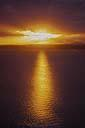

In [32]:
Image(filename='test_image.jpg') 

In [33]:
import cv2

In [34]:
img = cv2.imread("test_image.jpg")

In [35]:
img.shape

(128, 85, 3)

In [36]:
img = cv2.resize(img,(100,100))

In [37]:
img.shape

(100, 100, 3)

In [38]:
img = img.transpose((2,0,1))

In [39]:
img.shape

(3, 100, 100)

In [40]:
img = img.astype('float32')

In [41]:
img = img/255

In [42]:
img = np.expand_dims(img,axis=0)

In [43]:
img.shape

(1, 3, 100, 100)

In [44]:
pred = model.predict(img)

In [45]:
pred

array([[ 0.11157899,  0.01719043,  0.47336429,  0.95989317,  0.02528512]], dtype=float32)

In [46]:
y_pred = np.array([1 if pred[0,i]>=best_threshold[i] else 0 for i in range(pred.shape[1])])

In [47]:
y_pred

array([0, 0, 1, 1, 0])

In [38]:
classes = ['desert','mountains','sea','sunset','trees']

In [40]:
[classes[i] for i in range(5) if y_pred[i]==1 ]  #extracting actual class name

['desert', 'trees']